# Processing DHFR QM data for all residues
## Data from Lichirui and Xu, run with OLYP and pcSseg-0 basis set(lightweighted,good for NMR)
## Data location: ~/Dropbox/Xu_MDQMMM_data/afnmr_restart
## usiing KcsA_torsion python environment


In [1]:
# data structures
# snapshots fold: 0:100:9900
# within each fold, contains output for each residues named as schrodinger_md_{foldername}_{residues num}.out
# for example /Users/yunyao_1/Dropbox/Xu_MDQMMM_data/afnmr_restart/8400/schrodinger_md_8400_1.out
# within each output, we need write a function to parse the output file to get the data we want
# reuse some old scripts: ./read_orca.py and ./orca_analyzer.py
# read_orca.py: read orca output file and return a dictionary for certain nuclei (input as a flag, optional)
# the dictionary use nuclei as key(e.g 13N, atom_index+nuclei) and the value is 3*3 numpy array for shielding tensor
# orca_analyzer.py: read the dictionary from read_orca.py and correct for reference, then calculate the iso, aniso(delta and ita)
# correction value is input as a flag (based on TMS) for c $ref{"C"} = 189.8;  # TMS\
#    $reference_set = "OLYP ref_seg0 ";
#    $ref{"H"} = 33.2;   # TMS
#    $ref{"C"} = 189.8;  # TMS
#    $ref{"N"} = 241.0;  # CH3NO2 + 380.5
#    $ref{"P"} = 300.0;  # guess
#    $ref{"F"} = 130.2;  # CFCl3

# output will a csv file, whith column names=['resNO','atom','resNam','iso','delta','ita','alpha','betta','gamma']
# alternatively way is to use afnmr to extra csa value: extract_shift_v2.py (pqr file is needed)

# I used the second method as the output results are clean, and I don't want to spend time to tide up the first method.


In [2]:
# the first mthoed is kept here for reference

# from orca_analyzer import ShieldingTensorAnalyzer
# from read_orca import extract_tensors_from_fileo
# import os
# import numpy as np

# def analyze_orca_output(path):
#     utput_dir = os.path.dirname(path)
#     file_name = os.path.splitext(os.path.basename(path))[0] 
#     c_dataset = extract_tensors_from_file(path, 'C')
#     n_dataset = extract_tensors_from_file(path, 'N')
#     h_dataset = extract_tensors_from_file(path, 'H')
    
#     # Initialize analyzers
#     c_analyzer = ShieldingTensorAnalyzer(c_dataset, 189.8)
#     n_analyzer = ShieldingTensorAnalyzer(n_dataset, 241.0)
#     h_analyzer = ShieldingTensorAnalyzer(h_dataset, 33.2)

#     # Compute isotropic shift, delta value, and ita value for Cd
#     cd_iso = [cd_analyzer.isotropic_shift(key) for key in cd_dataset.keys() if 'Cd' in key]
#     cd_delta = [cd_analyzer.delta_value(key) for key in cd_dataset.keys() if 'Cd' in key]
#     cd_ita = [cd_analyzer.ita_value(key) for key in cd_dataset.keys() if 'Cd' in key]

#     # Compute isotropic shift, delta value, and ita value for Se
#     se_iso = [se_analyzer.isotropic_shift(key) for key in se_dataset.keys() if 'Se' in key]
#     se_delta = [se_analyzer.delta_value(key) for key in se_dataset.keys() if 'Se' in key]
#     se_ita = [se_analyzer.ita_value(key) for key in se_dataset.keys() if 'Se' in key]

In [5]:
# read parsed nmr data
#directory for calcuated chemical shift inforamtion
import pandas as pd
import os
dir_cc='/Users/yunyao_1/Dropbox/Xu_MDQMMM_data/afnmr_restart/results'
# read files that starts with results
cc_dhfr_dict={}
for file in os.listdir(dir_cc):
    if file[0]=='r':
        full_f=os.path.join(dir_cc,file)
        cc_dhfr_dict[file.rstrip('.txt')]=pd.read_csv(full_f, sep='\t', header=None, names=['resNO','atom','resNam','iso','delta','ita','alpha','betta','gamma'])

In [6]:
# show the pd
cc_dhfr_dict['results_8400'].head()

,resNO,atom,resNam,iso,delta,ita,alpha,betta,gamma
0,1,N,MET,34.013,17.278,0.494,189.709,211.357,219.894
1,1,H1,MET,5.894,-10.386,0.330,20.401,23.825,37.692
2,1,H2,MET,4.408,-12.122,0.023,22.588,22.872,40.914
3,1,H3,MET,4.369,-9.106,0.588,21.602,26.955,37.937
4,1,CA,MET,57.332,-15.316,0.913,117.817,131.805,147.784


In [7]:
#  load torsion angle data in csv format 
dir_torsion='/Users/yunyao_1/Dropbox/KcsA/DHFR_Analysis/DHFR_torsion.csv'
torsion_df=pd.read_csv(dir_torsion)
torsion_df.head()


,frame_index,time_ps,A:1-psi,A:1-phi,A:2-psi,A:2-phi,A:3-psi,A:3-phi,A:4-psi,A:4-phi,...,A:155-psi,A:155-phi,A:156-psi,A:156-phi,A:157-psi,A:157-phi,A:158-psi,A:158-phi,A:159-psi,A:159-phi
0,0,0.000,86.919420,NaN,113.065137,-81.872220,108.559000,-105.456855,143.372481,-77.357033,...,139.468600,-131.468975,166.047430,-116.360639,149.337292,-143.895993,115.925083,-83.371272,NaN,-136.724001
1,1,100.002,127.803489,NaN,140.505293,-77.625424,156.902225,-130.515766,140.172950,-115.719789,...,137.334279,-150.518883,140.723689,-132.932105,150.600987,-107.068357,87.456414,-83.233679,NaN,-86.561022
2,2,200.004,169.019657,NaN,121.453296,-89.879954,146.118386,-100.815532,154.583913,-102.580808,...,141.049642,-127.595077,146.595250,-126.552846,152.769779,-124.511919,93.008272,-73.742338,NaN,-118.395834
3,3,300.006,-176.729882,NaN,139.931256,-116.353946,132.604424,-125.527717,140.046267,-94.277335,...,146.231135,-123.836972,162.874574,-132.747141,153.904041,-132.124027,119.048934,-84.470075,NaN,-129.902697
4,4,400.008,165.790724,NaN,140.149853,-94.004681,112.316630,-131.697686,134.215861,-62.143013,...,139.055973,-127.821038,148.804039,-107.272919,147.852278,-135.433615,109.189503,-85.331834,NaN,-124.448206


In [12]:
# combine all resulsts into one dataframe
# column include: resNO, atom, resNam, iso, delta, ita, alpha, betta, gamma, frame, torsion_p, torsion2
combined_df = pd.DataFrame(columns=['resNO', 'atom', 'resNam', 'iso', 'delta', 'ita', 'alpha', 'betta', 'gamma', 'frame'])

for key, df in cc_dhfr_dict.items():
    # key is in results_XXXX format, extract the frame number
    key = int(key.split('_')[1])
    df['frame'] = key
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# show the combined dataframe
combined_df.head()


,resNO,atom,resNam,iso,delta,ita,alpha,betta,gamma,frame
0,1,N,MET,22.136,16.024,0.233,202.840,225.012,228.740,9200
1,1,H1,MET,6.375,-12.215,0.315,18.794,22.641,39.040,9200
2,1,H2,MET,4.622,-11.899,0.263,21.066,24.192,40.477,9200
3,1,H3,MET,4.316,-11.676,0.022,22.916,23.177,40.560,9200
4,1,CA,MET,57.089,-22.118,0.746,113.398,129.906,154.829,9200


In [17]:
# Step 1: make sure time_ps is integer to align with frame
torsion_df["frame"] = torsion_df["time_ps"].astype(int)

# Step 2: pick one frame or merge all?
# If you want to merge by frame, you need df1 to also have a frame column
# Let's assume df1 already has "frame" (if not, you can assign one)
if "frame" not in combined_df.columns:
    raise ValueError("combined_df needs a 'frame' column to match with torsion_df['frame'].")

# Step 3: function to extract phi/psi for given residue
def get_angles(row, df2):
    frame = row["frame"]
    resno = row["resNO"]
    phi_col = f"A:{resno}-phi"
    psi_col = f"A:{resno}-psi"

    if phi_col in torsion_df.columns and psi_col in torsion_df.columns:
        match = torsion_df.loc[torsion_df["frame"] == frame]
        if not match.empty:
            phi = match[phi_col].values[0]
            psi = match[psi_col].values[0]
            return pd.Series({"phi": phi, "psi": psi})
    return pd.Series({"phi": np.nan, "psi": np.nan})

# Step 4: apply
angles = combined_df.apply(get_angles, axis=1, df2=torsion_df)

# Step 5: concatenate
final_df = pd.concat([combined_df, angles], axis=1)

# Step 6: reorder
final_df = final_df[['frame','resNO','atom','resNam','iso','delta','ita','alpha','betta','gamma','phi','psi']]

print(final_df.head(30))

   frame resNO  atom resNam      iso   delta    ita    alpha    betta  \
0   9200     1     N    MET   22.136  16.024  0.233  202.840  225.012   
1   9200     1    H1    MET    6.375 -12.215  0.315   18.794   22.641   
2   9200     1    H2    MET    4.622 -11.899  0.263   21.066   24.192   
3   9200     1    H3    MET    4.316 -11.676  0.022   22.916   23.177   
4   9200     1    CA    MET   57.089 -22.118  0.746  113.398  129.906   
5   9200     1    HA    MET    4.308   4.190  0.801   24.702   29.309   
6   9200     1    CB    MET   34.799 -16.650  0.471  142.751  150.601   
7   9200     1   HB2    MET    2.096  -4.393  0.864   27.009   30.805   
8   9200     1   HB3    MET    3.012  -7.456  0.949   22.923   29.998   
9   9200     1    CG    MET   32.836  28.005  0.713  128.959  160.986   
10  9200     1   HG2    MET    2.047   6.603  0.850   24.550   31.648   
11  9200     1   HG3    MET    2.313   5.929  0.755   24.958   31.614   
12  9200     1    CE    MET   27.105 -27.843  0.258

In [18]:
# sort final_df by frame and resNO
final_df = final_df.sort_values(by=['frame', 'resNO']).reset_index(drop=True)
# save the data to csv
final_df.to_csv('/Users/yunyao_1/Dropbox/KcsA/DHFR_Analysis/DHFR_NMR_torsion_cs_combined.csv', index=False)

In [16]:
# analysis ideas to do 
# Question 1: is it possible to use torsion angle  to predict backbone chemical shift?
# Question 2: adding residue type as a categorical variable
# Question 3. adding franking residue type as categorical variable
# Question 4. adding sidechain torsion angle as variable (calculatd CB position vs. real position )
# Question 4. adding torsion angles of franking residues as variable
# Question 5. adding solvent accessible surface area as variable (using mdtraj to calculate)
# Question 6. adding H-bonding information as variable (using mdtraj to calculate)
# Question 7. using ML method to predict chemical shift (e.g. random forest, xgboost, neural network)
# Question 8. using deep learning method to predict chemical shift (e.g. graph neural network)
# Question 9. using ESM model to code sequece and structure information (e.g. esm2, esmfold)
# Question 10. using attention mechanism to predict chemical shift (e.g. transformer)

In [5]:
# read the final dataframe and do ananlysis
import pandas as pd
final_df=pd.read_csv('/Users/yunyao_1/Dropbox/KcsA/DHFR_Analysis/DHFR_NMR_torsion_cs_combined.csv')
print(final_df.head(30))

    frame  resNO  atom resNam      iso    delta    ita    alpha    betta  \
0       0      1     N    MET   23.866   -9.927  0.973  207.343  216.999   
1       0      1    H1    MET    5.452  -15.603  0.060   19.477   20.415   
2       0      1    H2    MET    5.138  -13.440  0.237   19.746   22.938   
3       0      1    H3    MET    4.833  -12.364  0.172   21.122   23.247   
4       0      1    CA    MET   54.375   18.479  0.522  116.946  139.840   
5       0      1    HA    MET    3.942   -2.603  0.715   27.027   28.887   
6       0      1    CB    MET   31.858   25.973  0.718  131.969  161.607   
7       0      1   HB2    MET    2.375    6.019  0.603   24.806   32.021   
8       0      1   HB3    MET    1.968   -5.959  0.642   26.339   30.167   
9       0      1    CG    MET   34.123  -22.464  0.682  136.780  152.109   
10      0      1   HG2    MET    2.202   -6.372  0.819   25.203   30.420   
11      0      1   HG3    MET    2.330    6.188  0.984   24.682   30.920   
12      0   

In [6]:
# visualization torsion flip and chemical shift change
# from previous analysis, these reisudes show flipping behavior: 23 42 55 60 65 97 131
# define  neareast neighbour function to group the torsion angle into two states if possible
# input will be final_df['resNO], assign 0 or 1 for each state based on phi/psi angle
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def knn_cluster_torsion(final_df, min_samples=5, random_state=42):
    """
    Automatically cluster dataframe per residue into 1 or 2 groups
    based on silhouette score.

    Parameters
    ----------
    final_df : pd.DataFrame
        DataFrame containing 'phi' and 'psi' columns for each residue
    min_samples : int
        Minimum number of samples needed to attempt clustering
    random_state : int
        Random state for reproducibility

    Returns
    -------
 
    """
    clustered_dfs = []
    for resno, group in final_df.groupby('resNO'):
        values = group[['phi', 'psi']].dropna().values

        if len(values) < min_samples:
            # Too few samples → put all in one group
            group['state'] = 0
            continue

        # --- Try 1 cluster ---
        km1 = KMeans(n_clusters=1, random_state=random_state).fit(values)
        labels1 = km1.labels_
        score1 = -1  # silhouette not defined for 1 cluster

        # --- Try 2 clusters ---
        km2 = KMeans(n_clusters=2, random_state=random_state).fit(values)
        labels2 = km2.labels_
        try:
            score2 = silhouette_score(values, labels2)
        except:
            score2 = -1

        # Decide
        group = group.copy()
            
        if score2 > 0.3:  # threshold: strong cluster separation
            group['state'] = labels2
        else:
            group['state'] = labels1
        
        clustered_dfs.append(group)

    return pd.concat(clustered_dfs, axis=0)


In [7]:
# add state column based on the resulsts of knn clustering
df_with_states = knn_cluster_torsion(final_df)

 

/Users/yunyao_1/miniforge3/envs/KcsA_torsion/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yunyao_1/miniforge3/envs/KcsA_torsion/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yunyao_1/miniforge3/envs/KcsA_torsion/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yunyao_1/miniforge3/envs/KcsA_torsion/lib/python3.8/site-packages/sklearn/clus

In [9]:
df_with_states.head(100)

,frame,resNO,atom,resNam,iso,delta,ita,alpha,betta,gamma,phi,psi,state
17,0,2,N,ILE,131.085,107.914,0.055,2.001,160.909,166.833,-81.872220,113.065137,1
18,0,2,H,ILE,8.124,8.410,0.797,16.666,25.930,32.632,-81.872220,113.065137,1
19,0,2,CA,ILE,62.876,20.866,0.820,106.058,128.805,145.910,-81.872220,113.065137,1
20,0,2,HA,ILE,4.155,3.186,0.593,25.859,29.693,31.581,-81.872220,113.065137,1
21,0,2,CB,ILE,39.088,-12.961,0.997,137.772,150.692,163.673,-81.872220,113.065137,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11232,500,2,HB,ILE,1.879,4.570,0.865,26.751,31.631,35.583,-122.554032,136.262998,0
11233,500,2,CG2,ILE,19.165,-18.725,0.841,153.394,169.150,189.360,-122.554032,136.262998,0
11234,500,2,HG21,ILE,0.873,-5.386,0.876,27.277,31.993,37.713,-122.554032,136.262998,0
11235,500,2,HG22,ILE,1.068,-5.622,0.511,27.884,30.758,37.754,-122.554032,136.262998,0


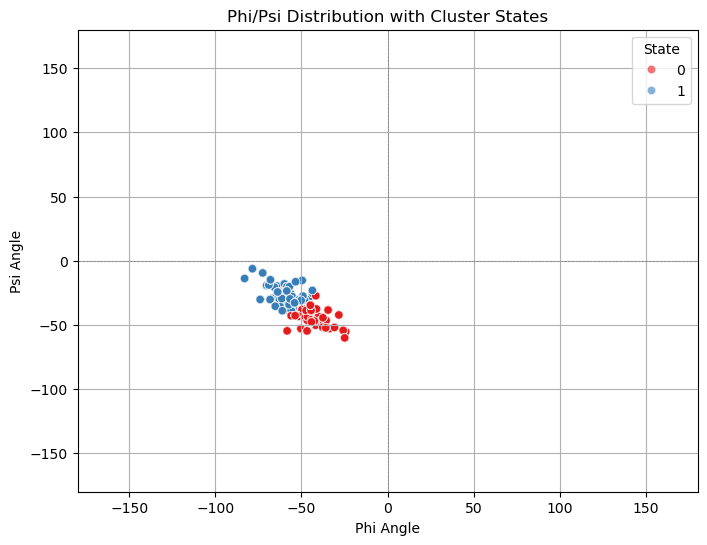

In [14]:
# visualization phi/psi distribution  with state color
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 6))
# only plot the first residue for clarity
sns.scatterplot(data=df_with_states[df_with_states['resNO'] == 20], x='phi', y='psi', hue='state', palette='Set1', alpha=0.6)
plt.title('Phi/Psi Distribution with Cluster States')
plt.xlabel('Phi Angle')
plt.ylabel('Psi Angle')
plt.legend(title='State')
plt.grid(True)
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.show()


In [ ]:
def plot_torsion(resno,df_with_states):
    plt.figure(figsize=(8, 6))
    x=df_with_states[df_with_states['resNO'] == resno & df_with_states['atom']=='N']['iso']
    y=df_with_states[df_with_states['resNO'] == resno & df_with_states['atom']=='C']['iso']
    sns.scatterplot(x=x, y=y, palette='Set1', alpha=0.6)
    plt.title(f'chemical shift Distribution for Residue {resno} with Cluster States')
    plt.xlabel('N chemical Shift')
    plt.ylabel('C chemical Shift')
    plt.grid(True)
    plt.show()


def plot_inter_torsion(resno, df_with_states):
    # Extract psi for resno and phi for resno+1
    psi_values = df_with_states.loc[df_with_states['resNO'] == resno, 'psi'].reset_index(drop=True)
    phi_values = df_with_states.loc[df_with_states['resNO'] == resno+1, 'phi'].reset_index(drop=True)

    # Align lengths (take min length to avoid mismatch)
    min_len = min(len(psi_values), len(phi_values))
    psi_values = psi_values[:min_len]
    phi_values = phi_values[:min_len]

    # Plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=psi_values, y=phi_values, color='grey', alpha=0.6, s=15)

    plt.title(f'Psi (Residue {resno}) vs Phi (Residue {resno+1})')
    plt.xlabel(f'Psi (Residue {resno})')
    plt.ylabel(f'Phi (Residue {resno+1})')
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
    plt.xlim(-180, 180)
    plt.ylim(-180, 180)
    plt.show()


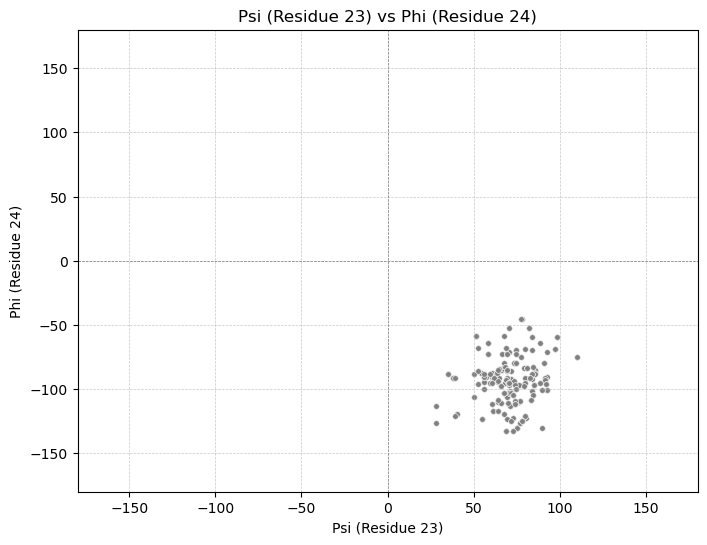

In [27]:
plot_inter_torsion(23,df_with_states)

In [37]:
# plot chemcial shift distribution of residues with N, C

# define a function to plot chemical shift distribution for a given residue number
def plot_cs_distribution(resno, df_with_states):
    #subset = df_with_states[df_with_states['resNO'] == resno]
    plt.figure(figsize=(8, 6))
    N_cs = df_with_states[(df_with_states['resNO'] == resno+1) & (df_with_states['atom'] == 'N')]['iso'].reset_index(drop=True)
    C_cs = df_with_states[(df_with_states['resNO'] == resno) & (df_with_states['atom'] == 'C')]['iso'].reset_index(drop=True)


    # Align lengths (take min length to avoid mismatch)
    min_len = min(len(N_cs), len(C_cs))
    N_cs = N_cs[:min_len]
    C_cs = C_cs[:min_len]
    sns.scatterplot(x=C_cs, y=N_cs, palette='Set1', alpha=0.6)
    plt.title(f'chemical shift Distribution for Residue {resno} with Cluster States')
    plt.xlabel('C chemical Shift')
    plt.ylabel('N chemical Shift')
    # reverse x axis for C chemical shift
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()

/var/folders/21/7pys71p923x0l1lrp08ll2w00000gp/T/ipykernel_1526/2262988717.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=C_cs, y=N_cs, palette='Set1', alpha=0.6)


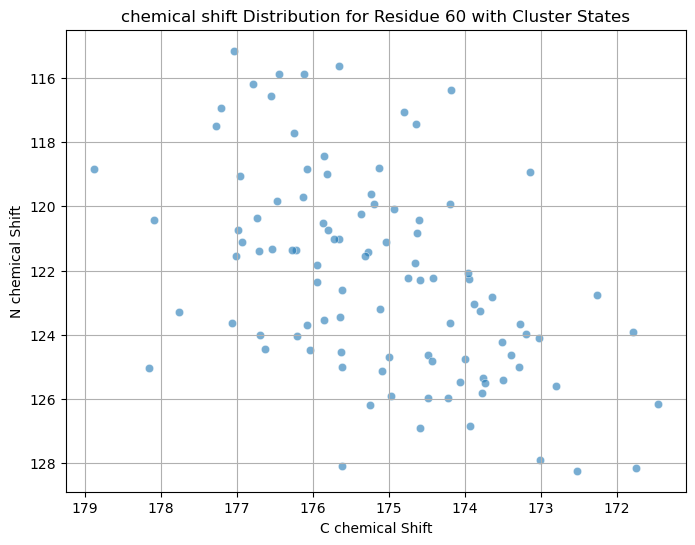

In [38]:
plot_cs_distribution(60,df_with_states)

/var/folders/21/7pys71p923x0l1lrp08ll2w00000gp/T/ipykernel_1526/2262988717.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=C_cs, y=N_cs, palette='Set1', alpha=0.6)


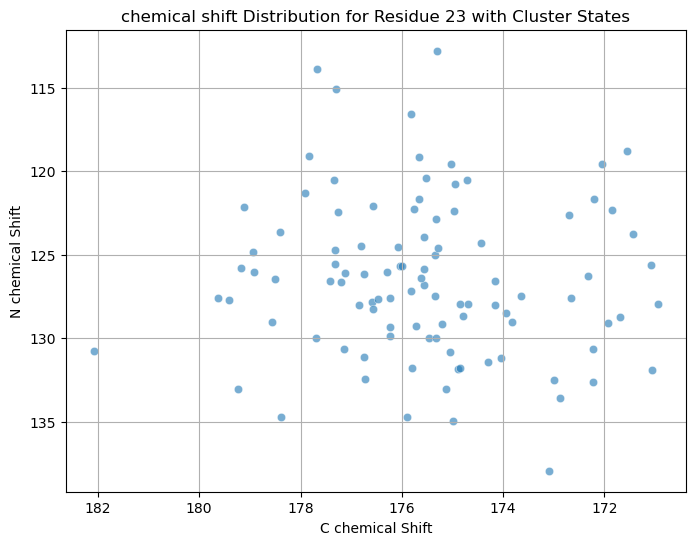

/var/folders/21/7pys71p923x0l1lrp08ll2w00000gp/T/ipykernel_1526/2262988717.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=C_cs, y=N_cs, palette='Set1', alpha=0.6)


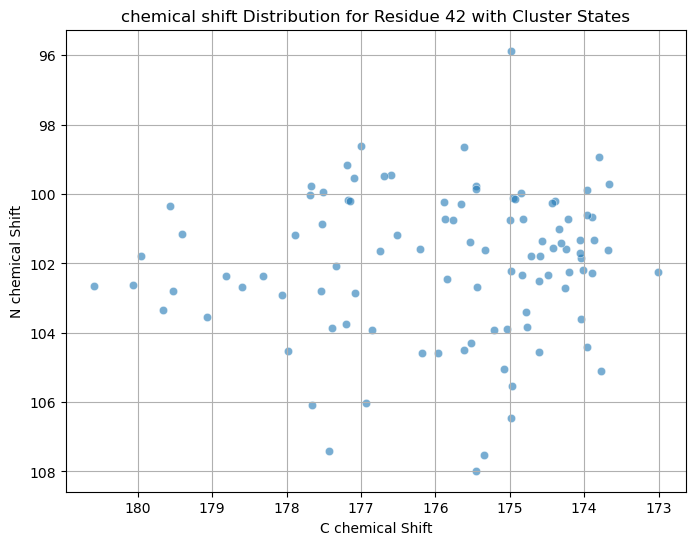

/var/folders/21/7pys71p923x0l1lrp08ll2w00000gp/T/ipykernel_1526/2262988717.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=C_cs, y=N_cs, palette='Set1', alpha=0.6)


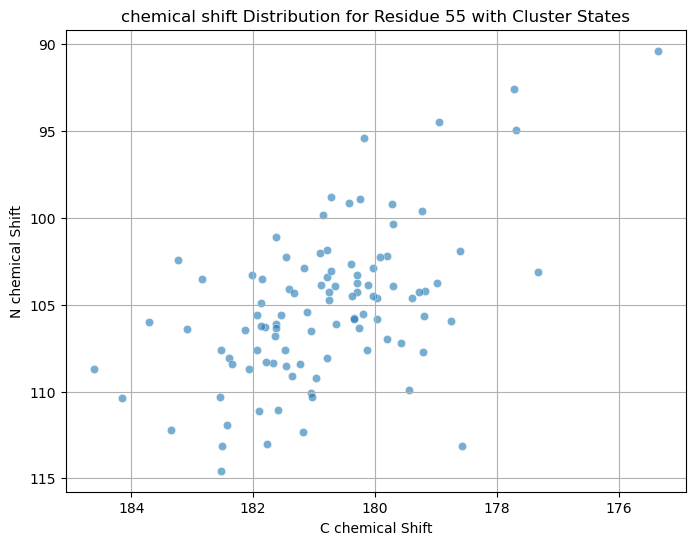

/var/folders/21/7pys71p923x0l1lrp08ll2w00000gp/T/ipykernel_1526/2262988717.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=C_cs, y=N_cs, palette='Set1', alpha=0.6)


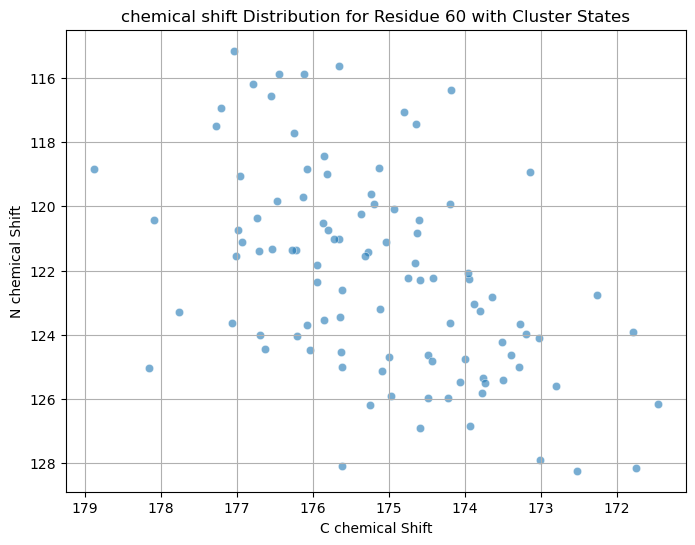

/var/folders/21/7pys71p923x0l1lrp08ll2w00000gp/T/ipykernel_1526/2262988717.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=C_cs, y=N_cs, palette='Set1', alpha=0.6)


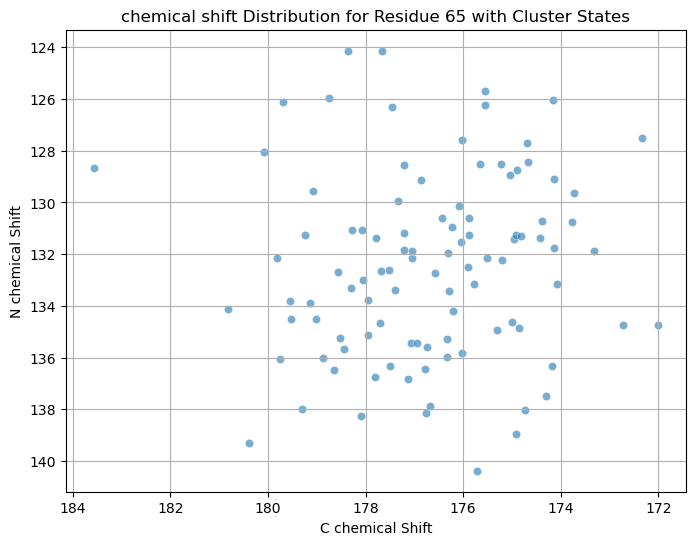

/var/folders/21/7pys71p923x0l1lrp08ll2w00000gp/T/ipykernel_1526/2262988717.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=C_cs, y=N_cs, palette='Set1', alpha=0.6)


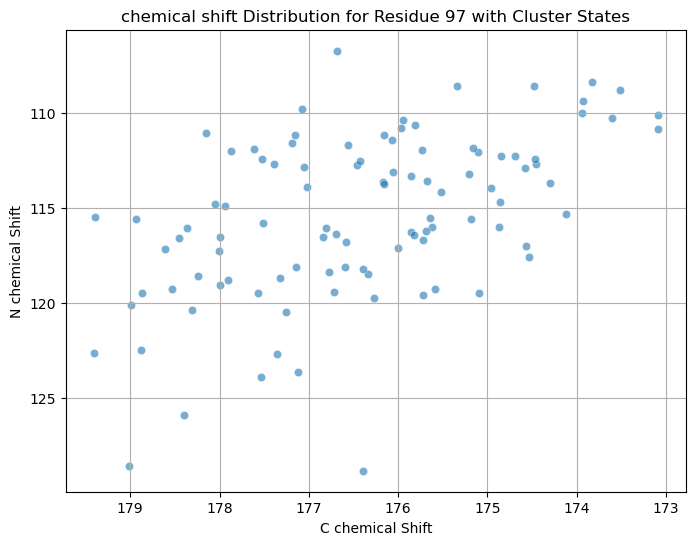

/var/folders/21/7pys71p923x0l1lrp08ll2w00000gp/T/ipykernel_1526/2262988717.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=C_cs, y=N_cs, palette='Set1', alpha=0.6)


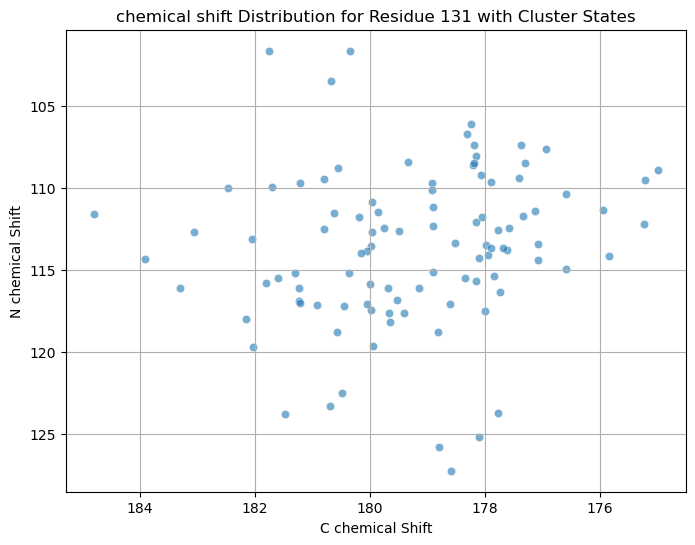

In [39]:
for resno in [23, 42, 55, 60, 65, 97, 131]:
    plot_cs_distribution(resno,df_with_states)


In [40]:
# dhfr sequence
# read ths txt file and store as a string : /Users/yunyao_1/Dropbox/TMP_Assignment_Data/DHFR_Sequence.txt

with open('/Users/yunyao_1/Dropbox/TMP_Assignment_Data/DHFR_Sequence.txt', 'r') as file:
    dhfr_seq = file.read().replace('\n', '')

#print the sequence
print(dhfr_seq)


MISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLNKPVIMGRHTWESIGRPLPGRKNIILSSQPGTDDRVTWVKSVDEAIAACGDVPEIMVIGGGRVYEQFLPKAQKLYLTHIDAEVEGDTHFPDYEPDDWESVFSEFHDADAQNSHSYCFEILERR


In [46]:
for resno in [23, 42, 55, 60, 65, 97, 131,146]:
    # index startig from 0, but residue number starts from 1
    print(f" {resno-1}{dhfr_seq[resno-1]}{dhfr_seq[resno]}{resno}")  # resno-1 because indexing starts at 0 in Python


 22NL23
 41MG42
 54PG55
 59II60
 64QP65
 96GR97
 130DD131
 145QN146


In [47]:
# find local squence of PG 
pg_indices = [i for i in range(len(dhfr_seq)-1) if dhfr_seq[i] == 'P' and dhfr_seq[i+1] == 'G']
print(pg_indices)

[54, 65]


In [48]:
# find local squence of DD
dd_indices = [i for i in range(len(dhfr_seq)-1) if dhfr_seq[i] == 'D' and dhfr_seq[i+1] == 'D']
print(dd_indices)

[68, 130]


In [49]:
# printe out the standard deviation of chemical shift (N, C) for each residue
# using pd.groupby and .std()
std_df = df_with_states.groupby(['resNO', 'atom'])['iso'].std().reset_index()
std_df = std_df.pivot(index='resNO', columns='atom', values='iso').reset_index()
std_df.columns.name = None  # remove the columns name
print(std_df)

     resNO         C        CA        CB        CD       CD1       CD2  CE  \
0        2  1.332692  1.609160  2.192186       NaN  2.855218       NaN NaN   
1        3  1.167860  2.336054  1.813008       NaN       NaN       NaN NaN   
2        4  1.593948  1.168369  2.466458       NaN  1.790271  3.116527 NaN   
3        5  1.041679  1.016262  1.246815       NaN  1.263362       NaN NaN   
4        6  0.996783  0.783510  1.336439       NaN       NaN       NaN NaN   
..     ...       ...       ...       ...       ...       ...       ...  ..   
152    154  1.702948  1.508257  1.398496  1.780192       NaN       NaN NaN   
153    155  1.181322  0.757425  1.230349       NaN  1.617601       NaN NaN   
154    156  1.358575  1.535545  1.501869       NaN  2.167282  3.009942 NaN   
155    157  1.428358  1.415218  1.437248  1.870851       NaN       NaN NaN   
156    158  1.793159  1.644585  1.902732  1.443723       NaN       NaN NaN   

     CE1  CE2  ...  HZ3         N  ND1  ND2        NE  NE1  NE2

Residue 72 N chemical shift std: 4.544518323155377, C chemical shift std: 1.904442026479731


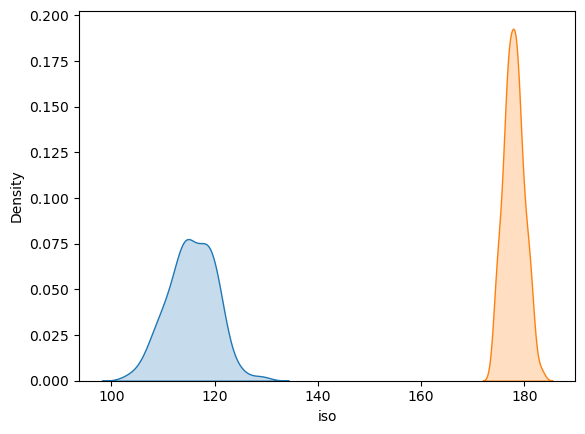

In [61]:
# the calcualted std seems small. sanity check with one experiment
# check residue 60, C and N
resno=72
n_cs = df_with_states[(df_with_states['resNO'] == resno+1) & (df_with_states['atom'] == 'N')]['iso'].reset_index(drop=True)
c_cs = df_with_states[(df_with_states['resNO'] == resno) & (df_with_states['atom'] == 'C')]['iso'].reset_index(drop=True)

# plot the distribution of n_cs and c_cs using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(n_cs, label='N chemical shift', fill=True)
sns.kdeplot(c_cs, label='C chemical shift', fill=True)
print(f"Residue {resno} N chemical shift std: {n_cs.std()}, C chemical shift std: {c_cs.std()}")

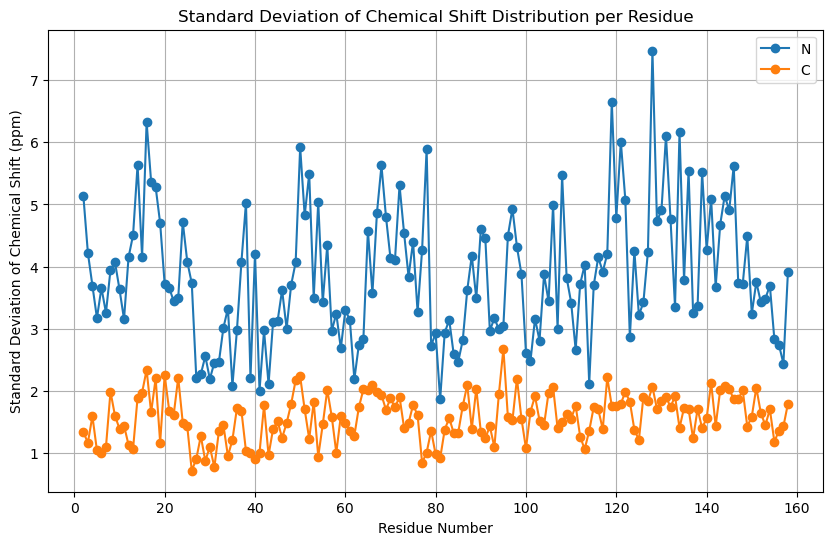

In [52]:
# plot the standard deviation of chemical shift distribution of each residue fore N and C
plt.figure(figsize=(10, 6))
RESNO = std_df['resNO'].to_numpy()
std_N = std_df['N'].to_numpy()
std_C = std_df['C'].to_numpy()
plt.plot(RESNO, std_N, marker='o', label='N')
plt.plot(RESNO, std_C, marker='o', label='C')
plt.xlabel('Residue Number')
plt.ylabel('Standard Deviation of Chemical Shift (ppm)')
plt.title('Standard Deviation of Chemical Shift Distribution per Residue')
plt.legend()
plt.grid(True)
plt.show()

## Alert
We previously attribute the distribution of CS of 60II61 pair to be tosion angle change.
It is certaily valid. 
But I60 is not even the one with the largest deviation in chemical shift distribution.
What can be say about those sites that show even broader distribution?

     resNO        phi        psi
0        2  13.939234  10.293412
1        3  15.093610  14.205649
2        4  21.008940   9.386806
3        5  10.278265   8.487137
4        6   9.541294  34.612748
..     ...        ...        ...
152    154  13.471491   9.427486
153    155  12.296402  10.658126
154    156  14.402784  10.469898
155    157  12.572284   8.676282
156    158  10.391335  19.548601

[157 rows x 3 columns]


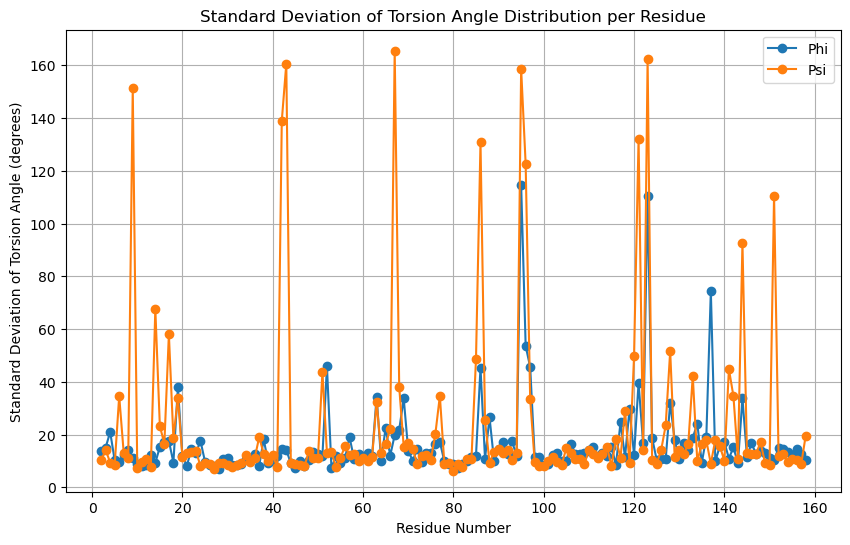

In [62]:
# plot the standard deviation of torsion angle distribution of each residue fore phi and psi
# treat phi and psi as non-circular for simplicity
torsion_std_df = df_with_states.groupby('resNO')[['phi', 'psi']].std().reset_index()
print(torsion_std_df)
plt.figure(figsize=(10, 6))
RESNO = torsion_std_df['resNO'].to_numpy()
std_phi = torsion_std_df['phi'].to_numpy()
std_psi = torsion_std_df['psi'].to_numpy()
plt.plot(RESNO, std_phi, marker='o', label='Phi')
plt.plot(RESNO, std_psi, marker='o', label='Psi')
plt.xlabel('Residue Number')
plt.ylabel('Standard Deviation of Torsion Angle (degrees)')
plt.title('Standard Deviation of Torsion Angle Distribution per Residue')
plt.legend()
plt.grid(True)
plt.show()  

In [63]:
# now treat them as circular and use circular statistics to calculate the standard deviation
from scipy.stats import circstd
torsion_circstd_df = df_with_states.groupby('resNO')[['phi', 'psi']].agg(lambda x: circstd(x, high=180, low=-180)).reset_index()
print(torsion_circstd_df)   

     resNO        phi        psi
0        2  13.956032  10.289496
1        3  15.108617  14.197401
2        4  21.041254   9.387620
3        5  10.276746   8.482438
4        6   9.542114  10.417956
..     ...        ...        ...
152    154  13.422369   9.428637
153    155  12.288568  10.639339
154    156  14.412555  10.469300
155    157  12.567664   8.677945
156    158  10.390163  19.550508

[157 rows x 3 columns]


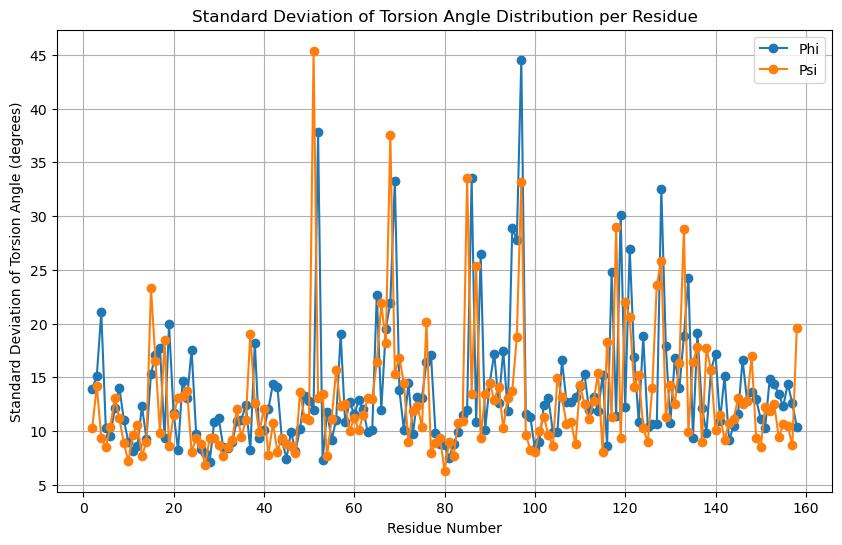

In [64]:
# plot the circular std
plt.figure(figsize=(10, 6))
RESNO = torsion_circstd_df['resNO'].to_numpy()
std_phi = torsion_circstd_df['phi'].to_numpy()
std_psi = torsion_circstd_df['psi'].to_numpy()
plt.plot(RESNO, std_phi, marker='o', label='Phi')
plt.plot(RESNO, std_psi, marker='o', label='Psi')
plt.xlabel('Residue Number')
plt.ylabel('Standard Deviation of Torsion Angle (degrees)')
plt.title('Standard Deviation of Torsion Angle Distribution per Residue')
plt.legend()
plt.grid(True)
plt.show() 

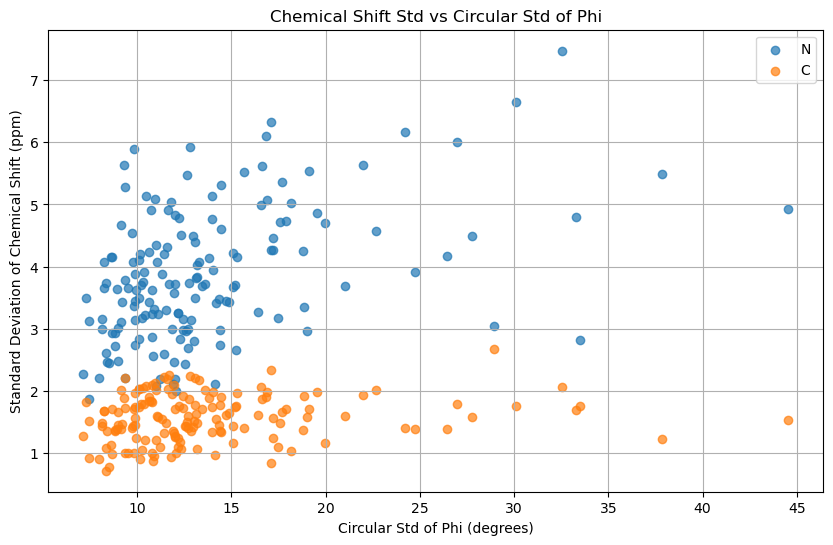

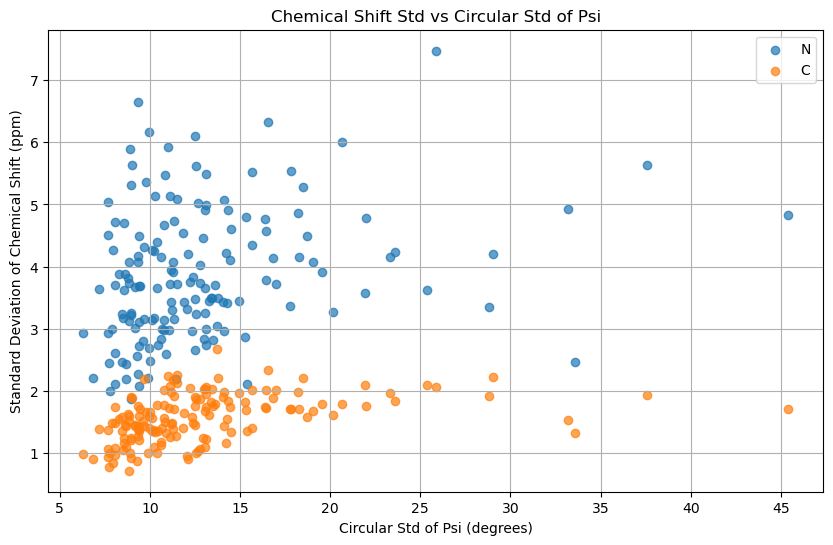

In [65]:
# plot cir torsion std vs chemical shift std for N and C
plt.figure(figsize=(10, 6))
RESNO = std_df['resNO'].to_numpy()
std_N = std_df['N'].to_numpy()
std_C = std_df['C'].to_numpy()
std_phi = torsion_circstd_df['phi'].to_numpy()
std_psi = torsion_circstd_df['psi'].to_numpy()
plt.scatter(std_phi, std_N, label='N', alpha=0.7)
plt.scatter(std_phi, std_C, label='C', alpha=0.7)
plt.xlabel('Circular Std of Phi (degrees)')
plt.ylabel('Standard Deviation of Chemical Shift (ppm)')
plt.title('Chemical Shift Std vs Circular Std of Phi')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(std_psi, std_N, label='N', alpha=0.7)
plt.scatter(std_psi, std_C, label='C', alpha=0.7)
plt.xlabel('Circular Std of Psi (degrees)')
plt.ylabel('Standard Deviation of Chemical Shift (ppm)')
plt.title('Chemical Shift Std vs Circular Std of Psi')
plt.legend()
plt.grid(True)
plt.show()
